In [1]:
%matplotlib inline
%precision 3

from numpy.random import randn
import numpy as np
import pandas as pd
np.random.seed(123)
import os
import re
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 10

import datetime

from numpy import nan as NA

In [2]:
#!powershell -command "& {gc NCDB_1999_to_2014.csv -head 10}"
#!powershell -command "& {gc NCDB_1999_to_2014_s.csv -head 10}"

In [3]:
#accident = pd.read_csv('NCDB_1999_to_2014.csv', engine = 'python')
#accident = pd.read_csv('NCDB_1999_to_2014_s.csv', engine = 'python')
accident = pd.read_csv('../../data/small/NCDB_1999_to_2014-002.csv', engine = 'python') #-- small
#accident = pd.read_csv('../../data/NCDB_1999_to_2014.csv', engine = 'python') # -- full

In [4]:
#replace all column head to lower case.

accident.columns = accident.columns.map(lambda x: x[:].lower())
accident

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
0,1999,01,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,01,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,01,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2003,10,7,15,2,02,21,02,3,2,...,01,05,1994,01,M,UU,11,1,02,1
1999996,2003,10,7,15,2,02,21,02,3,2,...,02,01,1997,01,F,UU,11,1,02,1
1999997,2003,10,7,15,2,02,21,02,3,2,...,02,01,1997,02,M,01,22,2,02,2
1999998,2003,10,7,14,2,01,01,01,2,1,...,01,NN,1996,01,M,53,11,1,UU,U


In [5]:
#check the non-numberic values in date-time columns

accident[accident['c_mnth'].str.contains('[^0-9]')|
         accident['c_wday'].str.contains('[^0-9]')|
         accident['c_hour'].str.contains('[^0-9]')]

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
128,1999,01,1,UU,2,02,33,02,1,1,...,01,06,1990,01,M,57,11,1,02,1
129,1999,01,1,UU,2,02,33,02,1,1,...,02,01,1991,01,M,18,11,2,02,1
175,1999,01,1,UU,2,01,03,UU,1,4,...,01,01,1989,01,M,30,11,2,02,1
176,1999,01,1,UU,2,01,03,UU,1,4,...,01,01,1989,02,M,29,13,2,02,2
177,1999,01,1,UU,2,01,03,UU,1,4,...,01,01,1989,03,M,01,21,2,02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998583,2003,10,6,UU,2,01,06,UU,1,1,...,01,01,1991,01,M,15,11,2,02,1
1998727,2003,10,6,UU,2,01,04,01,1,1,...,01,14,1990,01,M,31,96,2,09,5
1999445,2003,10,6,UU,2,01,04,01,1,1,...,01,01,2003,01,F,24,11,2,02,1
1999446,2003,10,6,UU,2,01,04,01,1,1,...,01,01,2003,02,F,21,13,2,02,2


In [6]:
#remove all special values (unknown to us) in date-time columns, prepare for using date series as index.
#make a copy "df" for further analysis, avoid mess up the original data "accident".

df = accident[:]
df[['c_mnth','c_wday','c_hour']]=df[['c_mnth','c_wday','c_hour']].replace('[^0-9]+',np.nan,regex=True)

#df.isnull().sum().sort_values()
df.dropna(axis=0,subset=['c_mnth','c_wday','c_hour'],inplace=True)
df

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
0,1999,01,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,01,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,01,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2003,10,7,15,2,02,21,02,3,2,...,01,05,1994,01,M,UU,11,1,02,1
1999996,2003,10,7,15,2,02,21,02,3,2,...,02,01,1997,01,F,UU,11,1,02,1
1999997,2003,10,7,15,2,02,21,02,3,2,...,02,01,1997,02,M,01,22,2,02,2
1999998,2003,10,7,14,2,01,01,01,2,1,...,01,NN,1996,01,M,53,11,1,UU,U


In [7]:
#generate the date-time column "date", and assign it as the index.

#df['date'] = pd.DatetimeIndex(df['c_year'].map(str) + '-' + df['c_mnth'] + '-' + df['c_wday'] + ' ' + df['c_hour'] + ':0:0')
df['date'] = pd.PeriodIndex(df['c_year'].map(str) + '-' + df['c_mnth'], freq='M')
df

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user,date
0,1999,01,1,20,2,02,34,UU,1,5,...,06,1990,01,M,41,11,1,UU,1,1999-01
1,1999,01,1,20,2,02,34,UU,1,5,...,01,1987,01,M,19,11,1,UU,1,1999-01
2,1999,01,1,20,2,02,34,UU,1,5,...,01,1987,02,F,20,13,2,02,2,1999-01
3,1999,01,1,08,2,01,01,UU,5,3,...,01,1986,01,M,46,11,1,UU,1,1999-01
4,1999,01,1,08,2,01,01,UU,5,3,...,NN,NNNN,01,M,05,99,2,UU,3,1999-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2003,10,7,15,2,02,21,02,3,2,...,05,1994,01,M,UU,11,1,02,1,2003-10
1999996,2003,10,7,15,2,02,21,02,3,2,...,01,1997,01,F,UU,11,1,02,1,2003-10
1999997,2003,10,7,15,2,02,21,02,3,2,...,01,1997,02,M,01,22,2,02,2,2003-10
1999998,2003,10,7,14,2,01,01,01,2,1,...,NN,1996,01,M,53,11,1,UU,U,2003-10


In [8]:
df.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1999990, 1999991, 1999992, 1999993, 1999994, 1999995, 1999996,
            1999997, 1999998, 1999999],
           dtype='int64', length=1979322)

In [9]:
# this line use 'date' as index, meke 'df' becoming time series.

df=df.set_index('date')
df

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
date,,,,,,,,,,,,,,,,,,,,,
1999-01,1999,01,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1999-01,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
1999-01,1999,01,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
1999-01,1999,01,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
1999-01,1999,01,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-10,2003,10,7,15,2,02,21,02,3,2,...,01,05,1994,01,M,UU,11,1,02,1
2003-10,2003,10,7,15,2,02,21,02,3,2,...,02,01,1997,01,F,UU,11,1,02,1
2003-10,2003,10,7,15,2,02,21,02,3,2,...,02,01,1997,02,M,01,22,2,02,2


In [10]:
# this code to check how many missing values.

# df.isnull().sum().sort_values()

In [11]:
# this code to check detail of missing values.

# df[df['c_vehs'].isnull()]


#### Proposed analytics for each selected category:
1. Category statistics (max, min, mean, etc.)
2. Trend over the whole period (increase, decrease, fluky)
3. Correlation between selected category and one or multiple other categories (as per table below)
The result of analysis for all selected categories will contribute to our recommendations in the conclusion. 
P.S.: We don't need to analyse all categories.

<div markdown style="float:left">

|Correlation combination|Collision date (day of week, hour)|Collision severity|Number of vehicles involved in collision|Collision configuration|Weather condition|Vehicle type|
|:--|:--|:--|:--|:--|:--|:--|
|Road alignment|R|R|R|R||NA|
|Vehicle type|R|R|R|R|R|NA|
|Vehicle model year|R|R|R|R|R|R|


##### Collision level data elements
<div markdown style="float:left">

|Data element|Columns|Column size|Definition|
|--|--|--|--|
|C_YEAR|1 – 4|4|Year|
|C_MNTH|5 – 6|2|Month|
|C_WDAY|7|1|Day of week|
|C_HOUR|8 – 9|2|Collision hour|
|C_SEV|10|1|Collision severity|
|C_VEHS|11 – 12|2|Number of vehicles involved in collision|
|C_CONF|13 – 14|2|Collision configuration|
|C_RCFG|15 – 16|2|Roadway configuration|
|C_WTHR|17|1|Weather condition|
|C_RSUR|18|1|Road surface|
|C_RALN|19|1|Road alignment|
|C_TRAF|20 – 21|2|Traffic control|

##### Vehicle level data elements
<div markdown style="float:left">

|Data element|Columns|Column size|Definition|
|--|--|--|--|
|V_ID|22 – 23|2|Vehicle sequence number|
|V_TYPE|24 – 25|2|Vehicle type|
|V_YEAR|26 – 29|4|Vehicle model year|



##### Person level data elements
<div markdown style="float:left">

|Data element|Columns|Column size|Definition|
|--|--|--|--|
|P_ID|30 – 31|2|Person sequence number|
|P_SEX|32|1|Person sex|
|P_AGE|33 – 34|2|Person age|
|P_PSN|35 – 36|2|Person position|
|P_ISEV|37|1|Medical treatment required|
|P_SAFE|38 – 39|2|Safety device used|
|P_USER|40|1|Road user class|


#### (1) Road Alignment

In [12]:
df.describe()

,c_year,c_sev
count,1.979322e+06,1.979322e+06
mean,2.000920e+03,1.982957e+00
std,1.382512e+00,1.294324e-01
min,1.999000e+03,1.000000e+00
25%,2.000000e+03,2.000000e+00
50%,2.001000e+03,2.000000e+00
75%,2.002000e+03,2.000000e+00
max,2.003000e+03,2.000000e+00


In [13]:
df_m=df.groupby(level=0)['c_sev'].count()
df_m

date
1999-01    33162
1999-02    26262
1999-03    29157
1999-04    28080
1999-05    35157
           ...  
2003-06    35631
2003-07    36244
2003-08    36322
2003-09    34079
2003-10    30832
Freq: M, Name: c_sev, Length: 58, dtype: int64

In [14]:
df_m.describe()

count       58.000000
mean     34126.241379
std       3732.694372
min      26262.000000
25%      31058.000000
50%      35277.000000
75%      36851.750000
max      39925.000000
Name: c_sev, dtype: float64

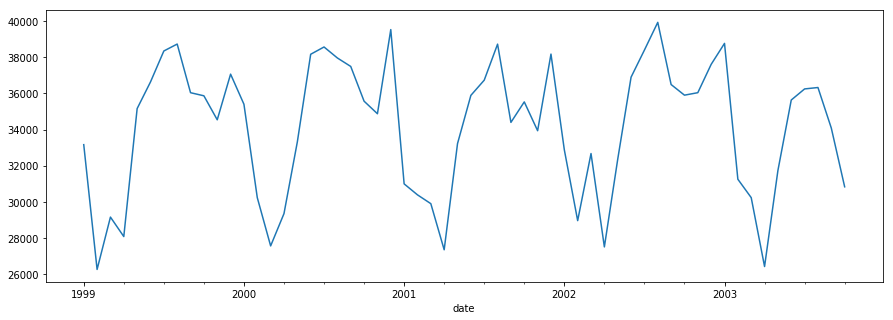

In [15]:
df_m.plot(figsize=(15,5))

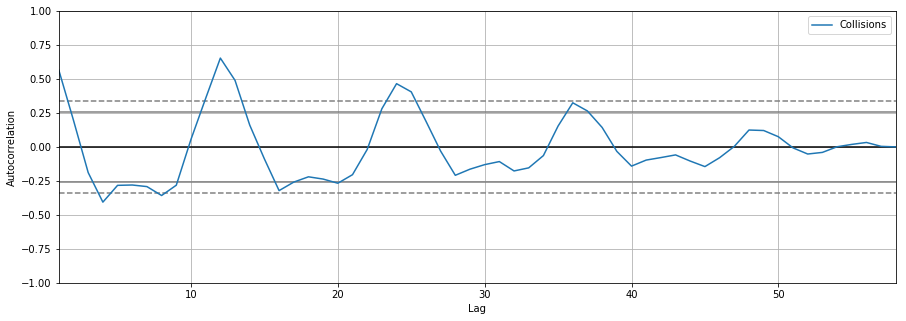

In [16]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(15,5))
autocorrelation_plot(df_m,label='Collisions')

##### C_RALN
<div markdown style="float:left">

|Code| Description|
|--|:--|
|1| Straight and level|
|2 |Straight with gradient|
|3 |Curved and level|
|4 |Curved with gradient|
|5 |Top of hill or gradient|
|6 |Bottom of hill or gradient "Sag"|
|Q |Choice is other than the preceding values|
|U| Unknown|
|X |Jurisdiction does not provide this data element|

In [17]:
#df1 = df1.set_index('date')